In [1]:
%matplotlib inline
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import plotutils

In [2]:
init_img = cv.imread('Data/Porquerolles.jpg')
shape = init_img.shape[1::-1]

In [3]:
coco_config = 'Data/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_graph = 'Data/frozen_inference_graph.pb'
labels = 'Data/Coco_Labels.txt'

model = cv.dnn_DetectionModel(frozen_graph, coco_config)

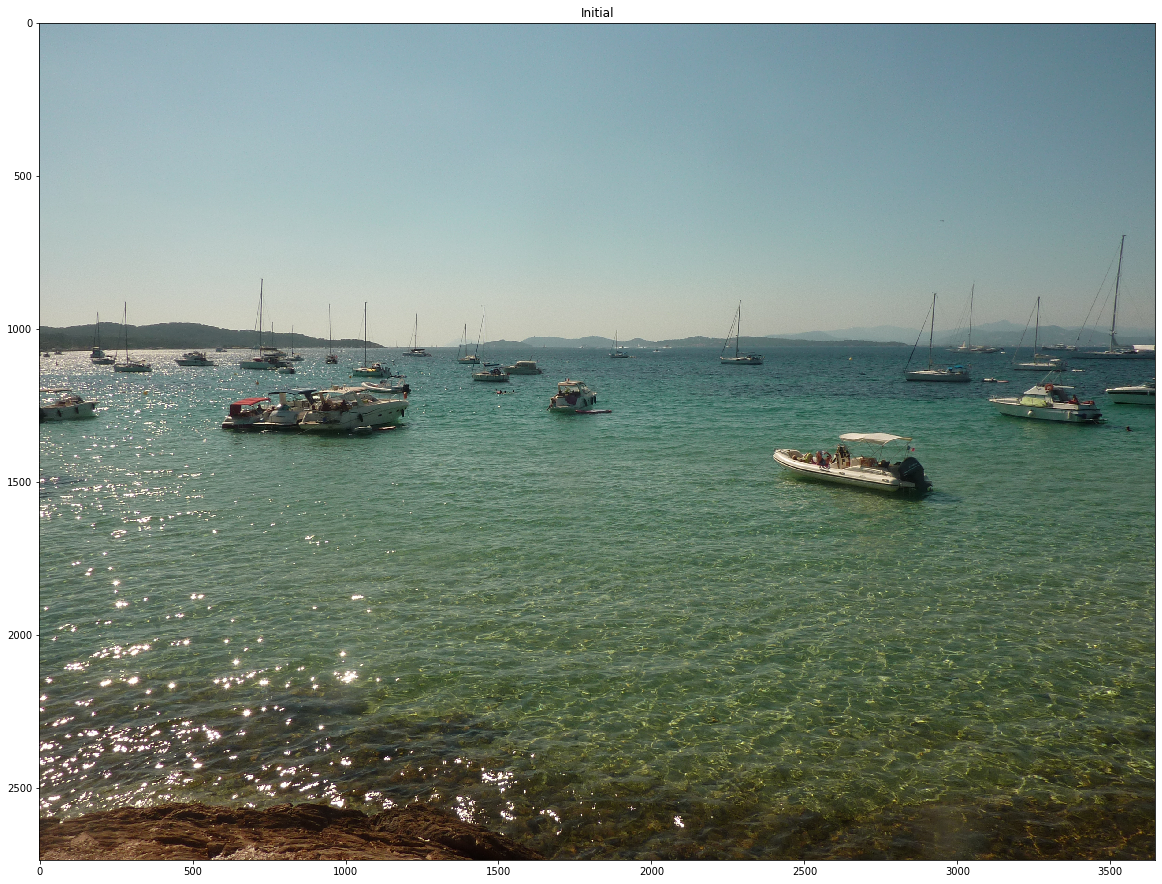

In [4]:
plotutils.show('Initial', init_img, 20, shape)

In [5]:
class_labels = []
with open(labels, 'rt') as fpt:
    class_labels = fpt.read().rstrip('\n').split('\n')

In [6]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

<dnn_Model 000001D91D128370>

In [7]:
class_idx, conf, bbox = model.detect(init_img, confThreshold = 0.4)

In [8]:
font_scale = 3
font = cv.FONT_HERSHEY_PLAIN

for class_i, c, b in zip(class_idx.flatten(), conf.flatten(), bbox):
    cv.rectangle(init_img, b, (255, 0, 0), 2)
    cv.putText(init_img, class_labels[class_i - 1], (b[0] + 10, b[1] + 30), font, 
               fontScale = font_scale, color = (10, 240, 50), thickness = 3)
    cv.putText(init_img, str(round((c*100), 2)) + ' %', (b[0] + 250, b[1] + 30), font, 
               fontScale = font_scale, color = (0, 250, 250), thickness = 3)
# The last message shows the confidence

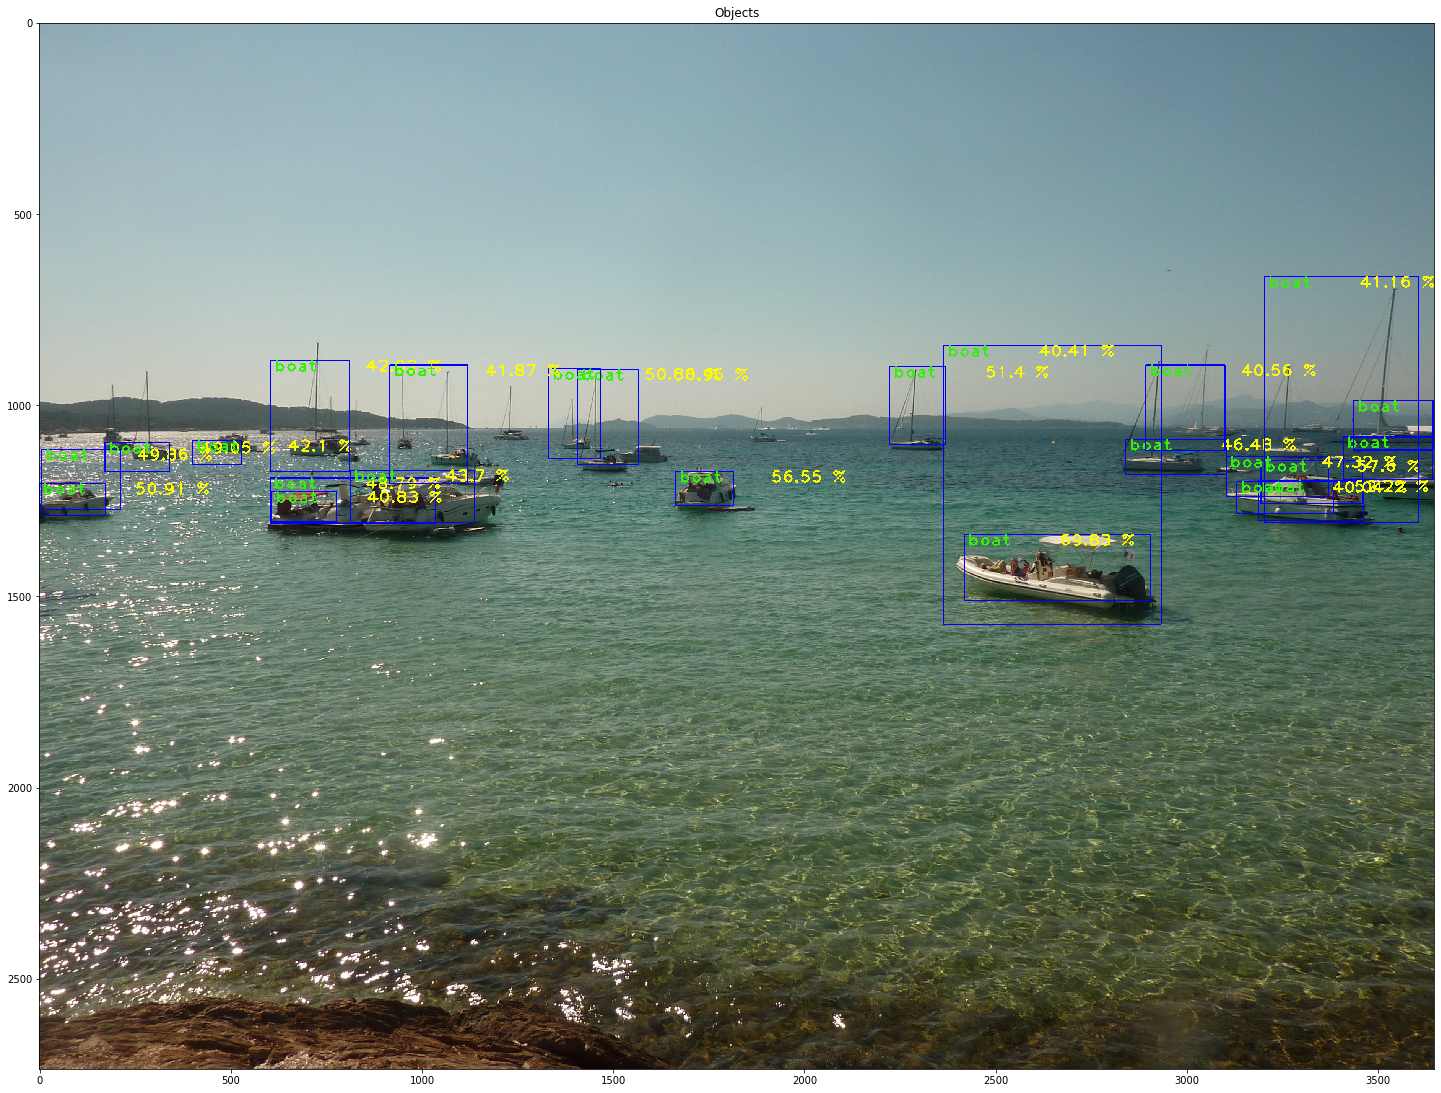

In [9]:
plotutils.show('Objects', init_img, 25, shape)